# Lecture 02a - Regression Basics

In [2]:
import numpy as np
import pandas as pd
import statsmodels
# we will use `smf` and `sm` to constract and estimate same regressions but using different ways
import statsmodels.formula.api as smf  
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
from matplotlib import pyplot as plt

While linear regression is a pretty simple task, there are several assumptions for the model that we may want to validate. I follow the regression diagnostic __[here](http://people.duke.edu/~rnau/testing.htm)__, trying to justify four principal assumptions, namely "L.I.N.E." in Python:

- **L**inearity
- **I**ndependence
- **N**ormality
- **E**qual variance (or homoscedasticity)

In fact, `statsmodels` contains useful modules for __[regression diagnostics](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html)__. In addition to those, I want to go with somewhat manual yet very simple ways for more flexible visualizations.

## Basic examples using simulated data

In [34]:
# Simulate data
n=1000           # number of observations
mu=0
sd=1
beta0=1          # define desired intercept
beta1=1.5        # define desired slope

# Simulate x data:
x=np.random.normal(loc=mu,scale=sd,size=(n,1))

# Simulate errors. Errors must be with zero mean, but you can make standard deviation more or less than standard deviation of x (try!)
err=np.random.normal(loc=0,scale=sd*4,size=(n,1))

# Calculate y data:
y = beta0 + beta1*x + err    # observed data (with error)
y_true = beta0 + beta1*x     # true data

There are several ways you can create a dataframe (pick one):

In [35]:
df=pd.DataFrame(data=np.hstack((x,y)), columns=['x','y'])                   # Option 1
# df = pd.DataFrame(np.concatenate([x,y], axis=1), columns= ['x','y'])      # Option 2
df

,x,y
0,1.118146,8.313243
1,0.157877,-9.101277
2,-0.781810,9.938305
3,-0.057496,3.279240
4,-0.686809,-0.657060
...,...,...
995,-0.182809,-1.093666
996,1.314856,1.434263
997,0.563319,-0.765155
998,-0.986371,-7.701671


The code below allows to create automatic column headings for each of your variables following a specific naming pattern:

In [36]:
df_alt = pd.DataFrame(np.concatenate([x,y], axis=1), columns= ['Var_{}'.format(i+1) for i in range(2)])
df_alt

,Var_1,Var_2
0,1.118146,8.313243
1,0.157877,-9.101277
2,-0.781810,9.938305
3,-0.057496,3.279240
4,-0.686809,-0.657060
...,...,...
995,-0.182809,-1.093666
996,1.314856,1.434263
997,0.563319,-0.765155
998,-0.986371,-7.701671


### Regression using `statsmodels.api` (imported as `sm`)

For more information, check Linear Regression from `statsmodels` __[documentation](https://www.statsmodels.org/dev/regression.html)__.

In [37]:
x_const=sm.add_constant(x,prepend=True)
x_const

array([[ 1.        ,  1.11814588],
       [ 1.        ,  0.15787727],
       [ 1.        , -0.78180952],
       ...,
       [ 1.        ,  0.56331884],
       [ 1.        , -0.9863711 ],
       [ 1.        , -0.50069757]])

In [38]:
reg=sm.OLS(y,x_const).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.02e-34
Time:                        14:29:06   Log-Likelihood:                -2796.2
No. Observations:                1000   AIC:                             5596.
Df Residuals:                     998   BIC:                             5606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8075      0.126      6.426      0.000       0.561       1.054
x1             1.5630      0.122     12.774      0.000       1.323       1.803
==============================================================================
Omnibus:                        1.832   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.870
Skew:                           0.075   Prob(JB):                        0.393
Kurtosis:                       2.850   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression using `statsmodels.formula.api` (imported as `smf`)

If you want to exclude a constant, use:
- `y ~ -1 + x` formula (the order of variables in the formula does not matter)

#### Operators
If `df` contains column names Lottery, Literacy, Wealth, and Region, you can apply formula like this:  
`reg = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region) -1 ', data=df).fit()`  

More on the format of the `formula` parameter: 

- `~` separates the left-hand side of the model from the right-hand side
- `+` adds new columns to the design matrix
- `-` sign can be used to remove columns/variables (by default, every model will include a constant, -1 forces removal of the constant)
- `C(name)` use this "wrapper" if you want to treat variable `name` explicitly as categorical
- `:` adds a new column to the design matrix with the product of the two columns
    - `reg1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit()`
- `*` will also include the individual columns that were multiplied together
    - `reg2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()`

You can apply vectorized functions to the variables in your model:
- `reg = smf.ols(formula='Lottery ~ np.log(Literacy)', data=df).fit()`  

or define a custom function and apply it

`def log_plus_1(x):`  
   ...... `return np.log(x) + 1.0`

`reg = smf.ols(formula='Lottery ~ log_plus_1(Literacy)', data=df).fit()`


Although it does not recognize the notation `x**2` (quadratic term), it does recognize `numpy` functions. Thus, you can use `np.power(x, 2)`.

More information is __[here](https://www.statsmodels.org/stable/example_formulas.html)__.

In [39]:
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.02e-34
Time:                        14:29:06   Log-Likelihood:                -2796.2
No. Observations:                1000   AIC:                             5596.
Df Residuals:                     998   BIC:                             5606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8075      0.126      6.426      0.000       0.561       1.054
x              1.5630      0.122     12.774      0.000       1.323       1.803
==============================================================================
Omnibus:                        1.832   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.870
Skew:                           0.075   Prob(JB):                        0.393
Kurtosis:                       2.850   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As an example, consider including a quadratic term into your regression:

In [40]:
reg_quadratic = smf.ols('y ~ x + np.power(x,2)', data=df).fit()
reg_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     81.68
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.41e-33
Time:                        14:29:07   Log-Likelihood:                -2796.0
No. Observations:                1000   AIC:                             5598.
Df Residuals:                     997   BIC:                             5613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8594      0.156      5.493      0.000       0.552       1.166
x                  1.5675      0.123     12.778      0.000       1.327       1.808
np.power(x, 2)    -0.0494      0.089     -0.557      0.578      -0.224       0.125
==============================================================================
Omnibus:                        1.794   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.835
Skew:                           0.074   Prob(JB):                        0.399
Kurtosis:                       2.852   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Accessing additional output values from regression

There are a number of saved results contained in the regression container (e.g., in our case, the variable `reg`) which you can access:

In [41]:
print('Parameters:\n', reg.params)
print('R2: ', reg.rsquared)
print('Adj R2: ', reg.rsquared_adj)

Parameters:
 Intercept    0.807490
x            1.562984
dtype: float64
R2:  0.14052127538892567
Adj R2:  0.13966007426206084


To see all available method and values, use:

In [ ]:
dir(reg)

Some of the most often used:

In [42]:
reg.condition_number # generally, for collinearity assessment
reg.cov_type         # is your Cov matrix robust on non-robust?
reg.df_resid         # degrees of freedom
reg.outlier_test()   # checks of outlier points (nrmally, would have to plot it to see)
reg.tvalues          # values of t-stats for your estimates
reg.bse              # standard errors of your estimates
reg.predict()        # predicted (fitted y's) values
reg.fittedvalues     # same as above (different data container)
# etc...

0      2.555135
1      1.054250
2     -0.414466
3      0.717625
4     -0.265981
         ...   
995    0.521762
996    2.862589
997    1.687949
998   -0.734192
999    0.024908
Length: 1000, dtype: float64

#### Why do we need to access these additional values? 
Allows to be more creative in constracting something of your own (a test, a plot, a function with multiple tests and plots):

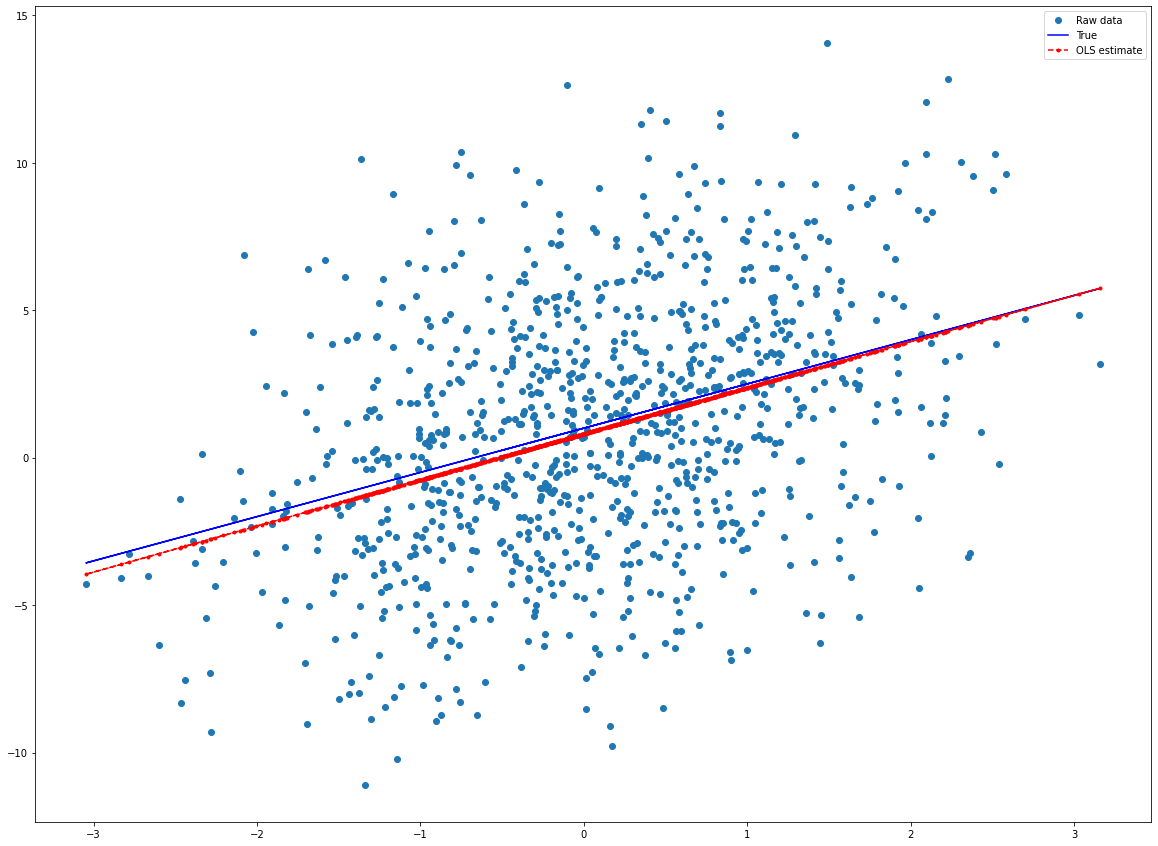

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax.legend(loc='best');

More advanced example (adding confidence intervals to your regression estimate):

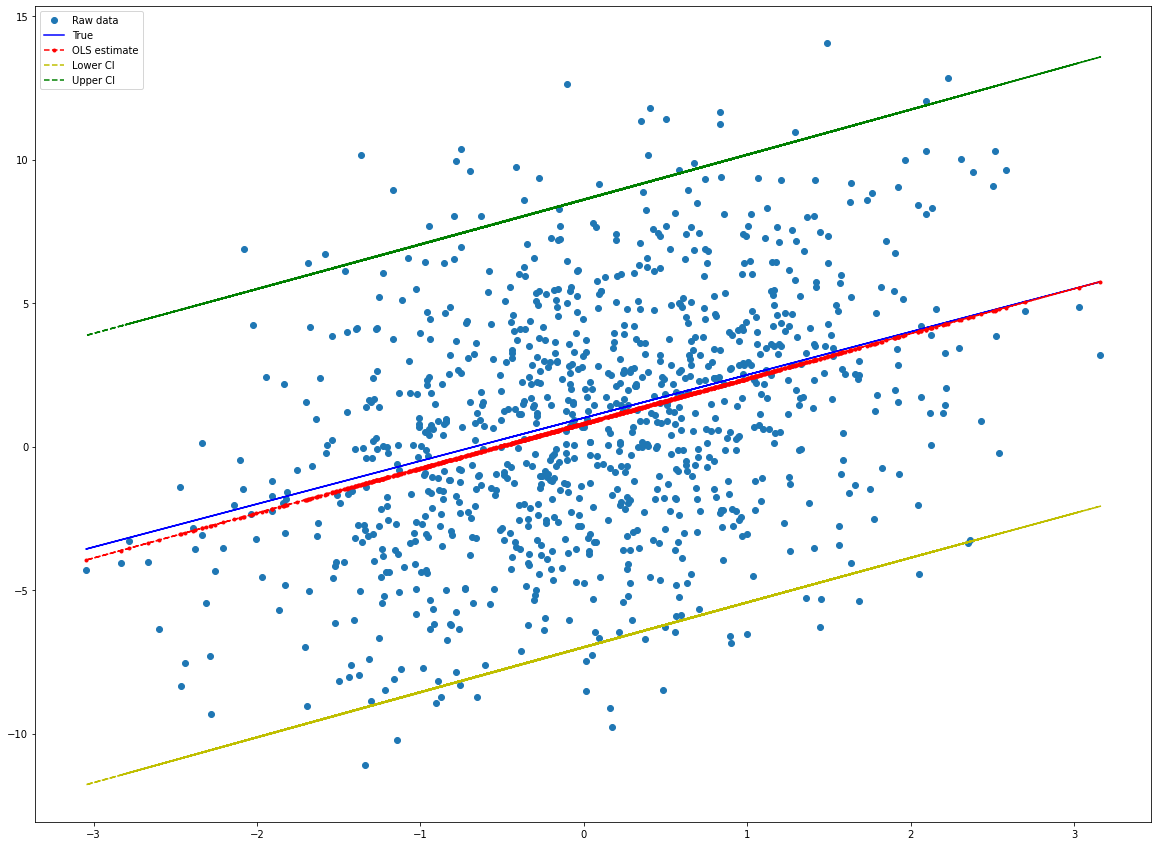

In [44]:
# Calculate standard deviation and confidence interval for prediction.
# Applies to WLS and OLS, not to general GLS, that is independently but not identically distributed observations

# Parameters:
# reg   : regression result instance
# alpha : significance (default: alpha = 0.05)

# Returns:
# prstd : array_like, 1d - standard error of prediction same length as data
# CI_L, CI_U : lower und upper confidence bounds

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, CI_L, CI_U = wls_prediction_std(reg,alpha=0.05)


fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax.plot(x, CI_L, 'y--', label="Lower CI")
ax.plot(x, CI_U, 'g--', label="Upper CI")
ax.legend(loc='best');

## Regression diagnostics

### Estimate regression

Dataset on moral statistics of France and variable definitions can be found [here](https://www.datavis.ca/gallery/guerry/guerrydat.html). 

Moral statistics most narrowly refers to numerical data generally considered to be indicative of social pathology in groups of people. Examples include statistics on crimes (against persons and property), illiteracy, suicide, illegitimacy, abortion, divorce, prostitution, etc. 


In [45]:
# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
df = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
reg = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=df).fit()

# Inspect the results
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.90e-08
Time:                        14:29:18   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality of the residuals

Last time we have looked at several statistical test for normality of variables. Even better, we can check the normality of any data, and, **more importantly**, the residuals of the regression. 

In [46]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html
test = sms.jarque_bera(reg.resid)
test

(3.3936080248431755,
 0.18326831231663288,
 -0.48658034311223436,
 3.003417757881633)

In [47]:
JBpvalue=test[1]
JBpvalue

0.18326831231663288

Create your own "helper" function for later use and apply it to your regression:

In [48]:
def JBtest(reg,a):
    # You may want to import requied libraries here as well, 
    # e.g., sms is defined at the begining of this Notebook, but could be included here in the function
    # in case you want to use it outside of this Notebook.
    test = sms.jarque_bera(reg.resid)
    JBpvalue=test[1]
    print(f'Jarque-Bera test:')
    if JBpvalue<=a:
        print(f'\tp-value is {JBpvalue:.03f}\n\tReject the null hypothesis that residuals are normally distributed. \n\tResiduals are NOT normally distributed.')
    else:
        print(f'\tp-value is {JBpvalue:.03f}\n\tFail to reject the null hypothesis that residuals are normally distributed. \n\tResiduals ARE normally distributed. ')
    return JBpvalue    

In [49]:
type(reg)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [50]:
type(reg.resid)

pandas.core.series.Series

In [51]:
jbpval=JBtest(reg,0.05)

Jarque-Bera test:
	p-value is 0.183
	Fail to reject the null hypothesis that residuals are normally distributed. 
	Residuals ARE normally distributed. 


> #### <font color=red>Homework</font>:
> * The function above in tailor-made to work with the regression object from `statsmodels` package. Not all regression object will have a method `.resid` to provide you with the fitted residuals. Think of a way to generalise the function above.

### Outlier detection

#### Influential observations

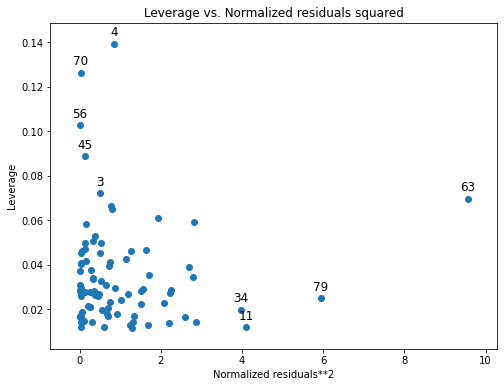

In [52]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(reg, ax = ax)

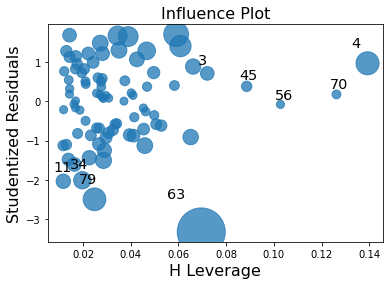

In [53]:
sm.graphics.influence_plot(reg)
plt.show()

## Simulation with a single outlier
Consider simulated example from earlier. We will impute a single outlier into the data. You may need to re-run the data generation process (DGP) several times to get the "best" outcome (aka large enough outlier):

In [54]:
# Simulate data
n=100           # number of observations          # MAKE CHANGES HERE
mu=0
sd=1
beta0=1          # define desired intercept
beta1=1.5        # define desired slope

# Simulate x data:
x=np.random.normal(loc=mu,scale=sd,size=(n,1))
x_const=sm.add_constant(x,prepend=True)

# Simulate errors. Errors must be with zero mean, but you can make standard deviation more or less than standard deviation of x (try!)
err=np.random.normal(loc=0,scale=sd*1,size=(n,1)) # MAKE CHANGES HERE

# Calculate y data:
y = beta0 + beta1*x + err    # observed data (with error)
y_true = beta0 + beta1*x     # true data

reg=sm.OLS(y,x_const).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           9.76e-22
Time:                        14:29:27   Log-Likelihood:                -151.67
No. Observations:                 100   AIC:                             307.3
Df Residuals:                      98   BIC:                             312.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9003      0.112      8.032      0.000       0.678       1.123
x1             1.4431      0.117     12.372      0.000       1.212       1.675
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.355
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.186
Skew:                           0.105   Prob(JB):                        0.911
Kurtosis:                       2.977   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
err_outlier=err
err_outlier[-1]=err_outlier[-1]*10
y_outlier = beta0 + beta1*x + err_outlier
reg_outlier=sm.OLS(y_outlier,x_const).fit()
reg_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.45e-21
Time:                        14:29:29   Log-Likelihood:                -154.56
No. Observations:                 100   AIC:                             313.1
Df Residuals:                      98   BIC:                             318.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9215      0.115      7.987      0.000       0.693       1.150
x1             1.4626      0.120     12.183      0.000       1.224       1.701
==============================================================================
Omnibus:                        0.603   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.489
Skew:                           0.171   Prob(JB):                        0.783
Kurtosis:                       2.966   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

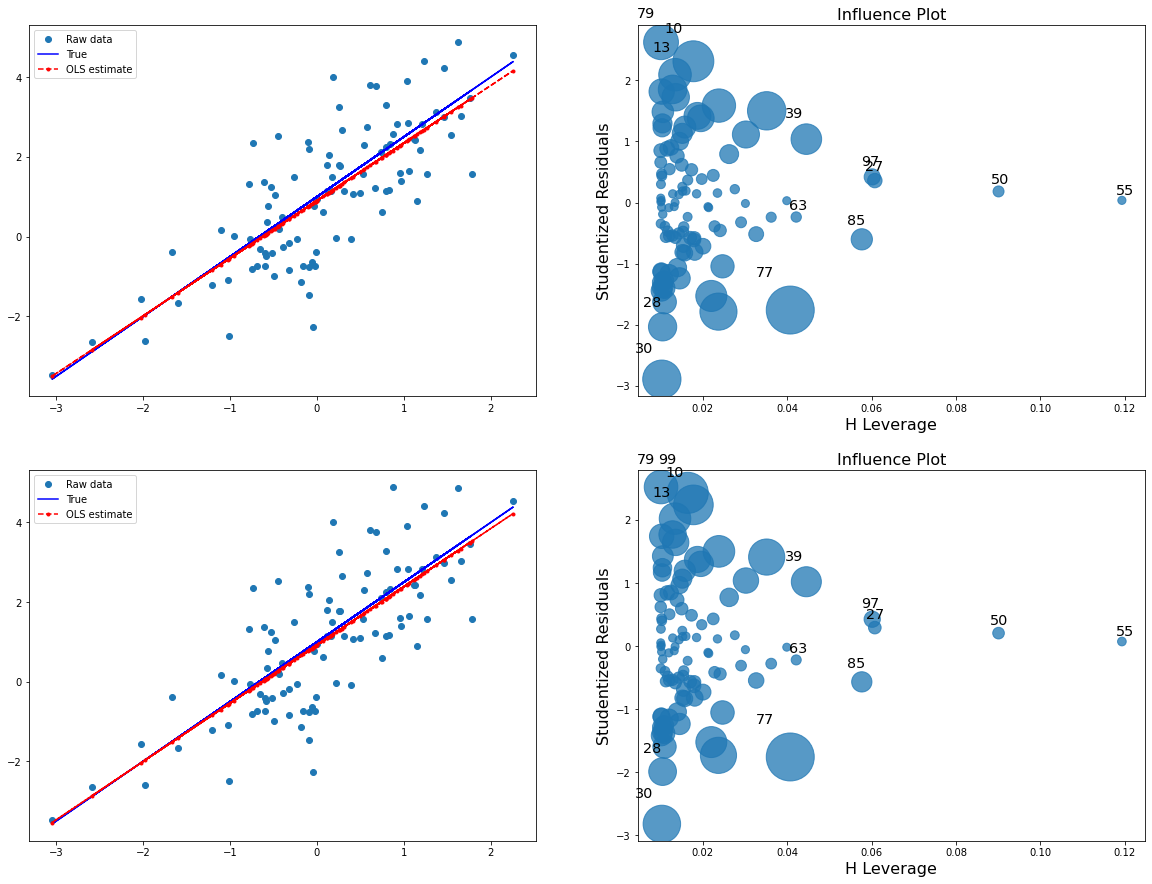

In [56]:
fig, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax1[0,0].plot(x, y, 'o', label="Raw data")
ax1[0,0].plot(x, y_true, 'b-', label="True")
ax1[0,0].plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax1[0,0].legend(loc='best')
sm.graphics.influence_plot(reg,ax=ax1[0,1])


ax1[1,0].plot(x, y_outlier, 'o', label="Raw data")
ax1[1,0].plot(x, y_true, 'b-', label="True")
ax1[1,0].plot(x, reg_outlier.fittedvalues, 'r--.', label="OLS estimate")
ax1[1,0].legend(loc='best')
sm.graphics.influence_plot(reg_outlier,ax=ax1[1,1])

plt.show()


### Encapsulating ellipse

Imagine you are trying to fit a certain percentage of data in an ellipse with the smallest area/volume:

In [3]:
from statsmodels.graphics.plot_grids import scatter_ellipse
data = sm.datasets.statecrime.load_pandas().data
data

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73
...,...,...,...,...,...,...,...
Virginia,230.0,4.7,86.6,10.5,24.0,70.4,69.79
Washington,338.3,2.8,89.7,12.3,22.2,80.2,74.97
West Virginia,331.2,4.9,82.8,17.7,23.3,94.3,33.20


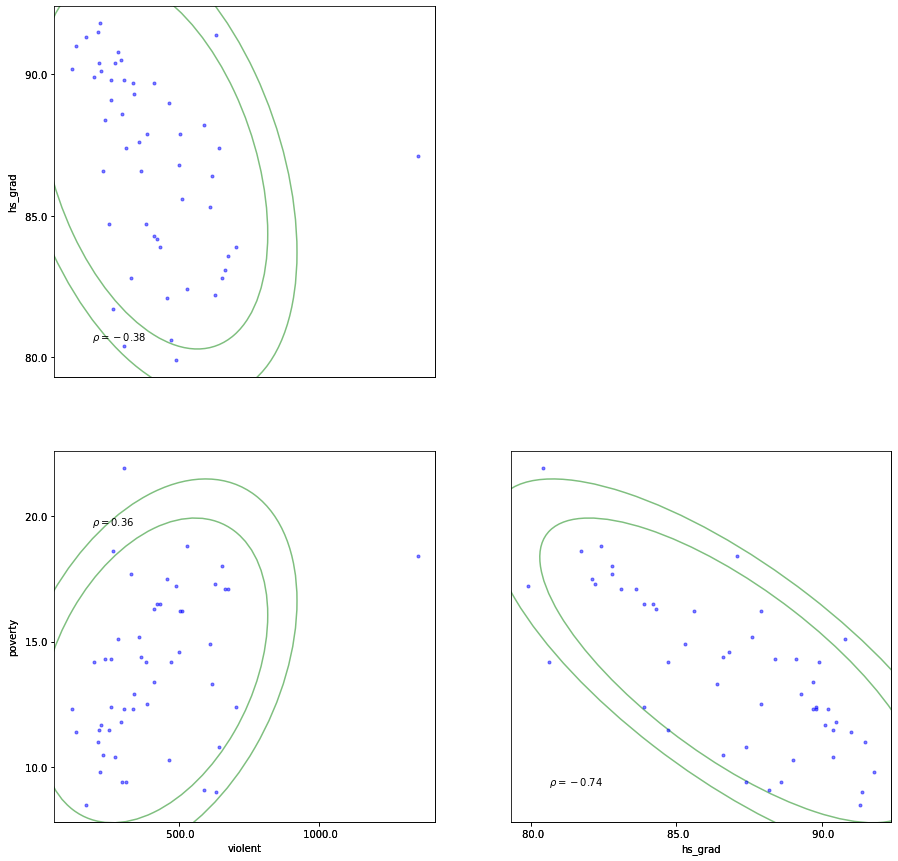

In [18]:
#subset=data[['murder','poverty']]
subset=data[['violent','hs_grad','poverty']]

fig = plt.figure(figsize=(15,15))
scatter_ellipse(subset, varnames=subset.columns, fig=fig, level=0.9, 
                plot_kwds={'color':'blue'},
                ell_kwds={'color':'red'})
scatter_ellipse(subset, varnames=subset.columns, fig=fig, level=[0.85,0.95], 
                plot_kwds={'color':'blue'},
                ell_kwds={'color':'green'})
plt.show()

### OLS with dummy variables

We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [86]:
nsample = 50

# Divide sample into three groups (categories)
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

#dummy = sm.categorical(groups, drop=True)
dummy = pd.get_dummies(groups, drop_first=False).values

x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [87]:
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.40816327,  0.        ,  0.        ,  1.        ],
       [ 0.81632653,  0.        ,  0.        ,  1.        ],
       [ 1.2244898 ,  0.        ,  0.        ,  1.        ],
       [ 1.63265306,  0.        ,  0.        ,  1.        ],
       [ 2.04081633,  0.        ,  0.        ,  1.        ],
       [ 2.44897959,  0.        ,  0.        ,  1.        ],
       [ 2.85714286,  0.        ,  0.        ,  1.        ],
       [ 3.26530612,  0.        ,  0.        ,  1.        ],
       [ 3.67346939,  0.        ,  0.        ,  1.        ],
       [ 4.08163265,  0.        ,  0.        ,  1.        ],
       [ 4.48979592,  0.        ,  0.        ,  1.        ],
       [ 4.89795918,  0.        ,  0.        ,  1.        ],
       [ 5.30612245,  0.        ,  0.        ,  1.        ],
       [ 5.71428571,  0.        ,  0.        ,  1.        ],
       [ 6.12244898,  0.        ,  0.        ,  1.        ],
       [ 6.53061224,  0.

In [88]:
# Aside: How to create dmy variables using Pandas:

dummies = pd.get_dummies(groups, drop_first=False)
dummies#.values

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
45,0,0,1
46,0,0,1
47,0,0,1
48,0,0,1


In [89]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     419.6
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.08e-33
Time:                        14:40:18   Log-Likelihood:                -77.292
No. Observations:                  50   AIC:                             162.6
Df Residuals:                      46   BIC:                             170.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9895      0.077     12.824      0.000       0.834       1.145
x2             3.2178      0.733      4.392      0.000       1.743       4.693
x3            -2.8159      1.194     -2.359      0.023      -5.219      -0.413
const          9.7619      0.399     24.438      0.000       8.958      10.566
==============================================================================
Omnibus:                        3.658   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.604
Skew:                           0.500   Prob(JB):                        0.272
Kurtosis:                       3.500   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

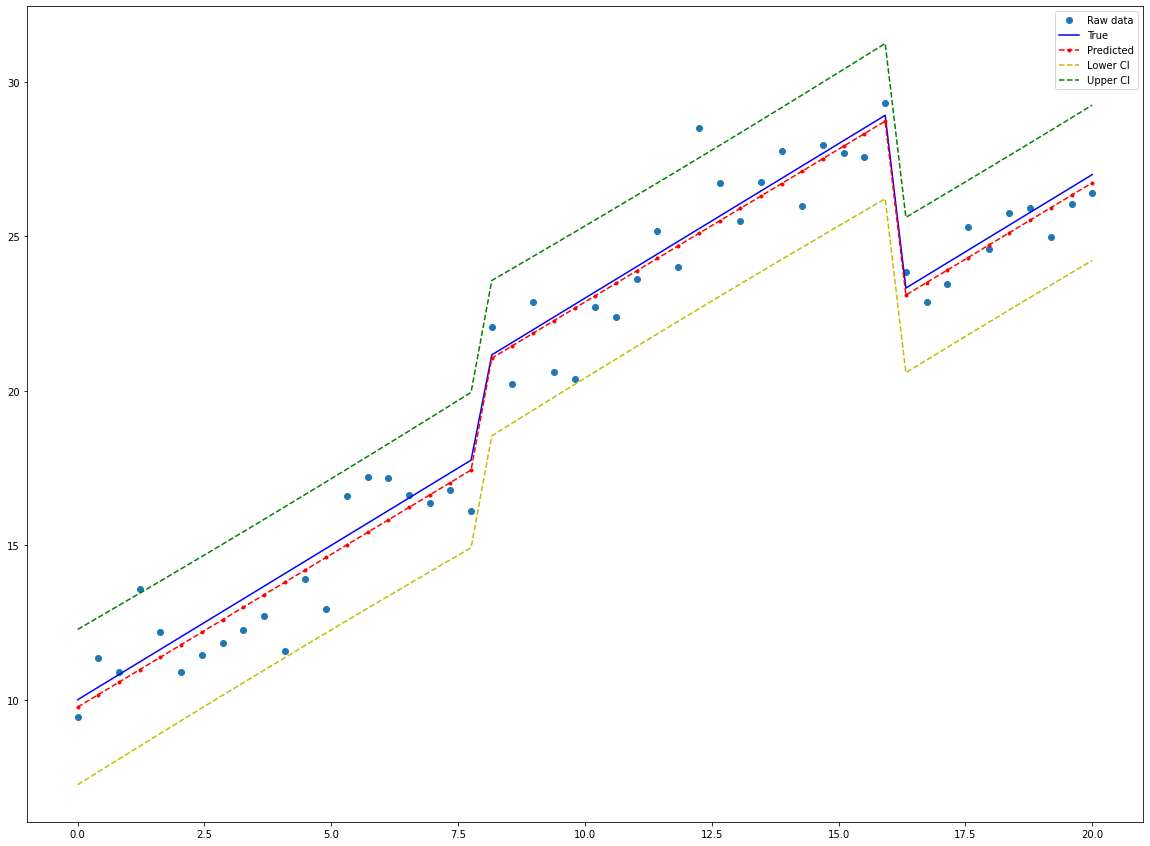

In [90]:
prstd, CI_L, CI_U = wls_prediction_std(reg, alpha=0.05)

fig, ax = plt.subplots(figsize=(20,15))

ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, CI_L, 'y--', label="Lower CI")
ax.plot(x, CI_U, 'g--', label="Upper CI")
legend = ax.legend(loc="best")


### Joint hypothesis test

### F-test

To test the hypothesis that both coefficients are equal to zero, that is, $R \times \beta =0$, apply an F-test to see if you can reject the null hypothesis:


In [91]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
reg.f_test(R)

[[0 1 0 0]
 [0 0 1 0]]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=90.85592127806017, p=1.0557496041311488e-16, df_denom=46, df_num=2>

You can also use formula-like syntax to test hypotheses

In [92]:
reg.f_test("x2 = x3 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=90.85592127806011, p=1.0557496041311622e-16, df_denom=46, df_num=2>

### (Multi)collinearity

Multiple regression is wonderful – It allows you to consider the effect of multiple variables simultaneously. On the flip side, multiple regression is extremely unpleasant - Because it allows you to consider the effect of multiple variables simultaneously.  

(Multi)collinearity (or inter correlation) exists when at least some of the predictor variables are correlated among themselves.     The parameter estimates will have inflated variance in presence of multicollineraity. Sometimes the signs of the parameter estimates tend to change. If the relation between the independent variables grows really strong then the variance of parameter estimates tends to be infinity.  

For additional information see __[Eight Ways to Detect Multicollinearity](https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/)__.

The **Longley** dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification.

In [93]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [94]:
ols_results = sm.OLS(y, X).fit()
ols_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.98e-10
Time:                        14:41:35   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Condition number

One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome. The first step is to normalize the independent variables to have unit length:

In [95]:
np.linalg.cond(reg.model.exog)

96.34204153176859

The next 4 cells of code are optional but provide more advanced insight into collinearity problem:

In [96]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

Then, we take the square root of the ratio of the biggest to the smallest eigen values.

In [97]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.86912108766


We can also look at formal statistics for this such as the DFBETAS – a standardized measure of how much each coefficient changes when that observation is left out.

In general we may consider DBETAS in absolute value greater than $\frac{2}{\sqrt{N}}$ to be influential observations

In [98]:
2./len(X)**.5

0.5

In [99]:
infl = ols_results.get_influence()
print(infl.summary_frame().filter(regex="dfb"))
print(infl.summary_frame().filter(regex="cooks_d"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:737: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:766: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


#### Variance Inflation Factor (VIF)

Suppose you want to estimate $Y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3+\beta_4X_4+\epsilon$

1. Build a model $X_1$ vs $X_2$, $X_3$, $X_4$ and find $R^2$, say $R_1$
2. Build a model $X_2$ vs $X_1$, $X_3$, $X_4$ and find $R^2$, say $R_2$
3. Build a model $X_3$ vs $X_1$, $X_2$, $X_4$ and find $R^2$, say $R_3$
4. Build a model $X_4$ vs $X_1$, $X_2$, $X_3$ and find $R^2$, say $R_4$

For example if $R_3$ is 95% then we don’t really need $X_3$ in the model, since it can be explained as liner combination of other three based on our estimated $R_3$.  

Thus, for each variable we find individual $R^2$, and calculate $VIF=\frac{1}{(1−R^2)}$.

> <font color=red>**Homework:**</font> Write a function that takes in X's and checks for pottential collinearity problem using VIF. Your input is array/matrix with X variables in columns or panda's DataFrame. Your output is the __sorted__ (from highest to lowest) list of (column name)/(VIF number) pairs.  


In [100]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [101]:
boston_dataset=load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
#boston.to_csv('boston.csv')

In [103]:
# Break into left and right hand side; y and X
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS +RAD + TAX + PTRATIO + B + LSTAT", data=boston, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1,X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
np.linalg.cond(result.model.exog)

15113.517599134953

In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        14:45:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
X

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [106]:
vif

[1.7921915474332413,
 2.298758178749441,
 3.9915964183460333,
 1.0739953275537886,
 4.393719847577493,
 1.9337444357832574,
 3.1008255128153372,
 3.955944906372728,
 7.484496335274472,
 9.00855394759707,
 1.7990840492488978,
 1.3485210764063753,
 2.9414910780919366]

In [107]:
# Break into left and right hand side; y and X
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS +RAD + PTRATIO + LSTAT", data=boston, return_type="dataframe")
# + AGE + TAX + B 

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1,X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
np.linalg.cond(result.model.exog)

819.5828693108101

In [108]:
vif

[1.767314809681978,
 2.154344382213968,
 3.2174312278042656,
 1.052262200733783,
 4.0389882469341,
 1.8264031055829315,
 3.613174628583744,
 2.7468357210758203,
 1.774762691807408,
 2.5467301795949644]

In [109]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     132.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          4.02e-133
Time:                        14:45:42   Log-Likelihood:                -1510.6
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     495   BIC:                             3090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8099      4.942      8.055      0.000      30.099      49.521
CRIM          -0.1204      0.033     -3.617      0.000      -0.186      -0.055
ZN             0.0364      0.014      2.681      0.008       0.010       0.063
INDUS         -0.0775      0.056     -1.375      0.170      -0.188       0.033
CHAS           3.2042      0.870      3.682      0.000       1.494       4.914
NOX          -19.5660      3.737     -5.236      0.000     -26.909     -12.223
RM             3.7738      0.414      9.105      0.000       2.959       4.588
DIS           -1.5147      0.195     -7.787      0.000      -1.897      -1.133
RAD            0.1119      0.041      2.727      0.007       0.031       0.192
PTRATIO       -0.9685      0.133     -7.304      0.000      -1.229      -0.708
LSTAT         -0.5471      0.048    -11.362      0.000      -0.642      -0.452
==============================================================================
Omnibus:                      162.407   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.919
Skew:                           1.413   Prob(JB):                    6.70e-140
Kurtosis:                       7.735   Cond. No.                         820.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Heteroskedasticity tests

#### Breusch-Pagan test:

In [110]:
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 56.27770580130538),
 ('p-value', 1.821096615301548e-08),
 ('f-value', 6.194370332758791),
 ('f p-value', 6.030543405130214e-09)]

#### Goldfeld-Quandt test:

In [111]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 2.0827497252809777), ('p-value', 8.558649434649818e-09)]

### Linearity test

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [112]:
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS ", data=boston, return_type="dataframe")
result = sm.OLS(y, X).fit()

name = ['t value', 'p value']
test = sms.linear_harvey_collier(result)
lzip(name, test)

[('t value', 1.2230462891319767), ('p value', 0.2218860466480405)]

## Further readings
- https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
- https://www.statsmodels.org/stable/diagnostic.html
- https://www.statsmodels.org/stable/graphics.html
- https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/
- An interesting new library for regression visualization (designed to work togethr with `sklearn`) https://www.scikit-yb.org/en/latest/api/regressor/index.html

